<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
<center>
Авторы материала: Ольга Дайховская (@aiho), Юрий Кашницкий (@yorko). 
    
Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 7 
## <center> Обучение без учителя

В этом задании мы разберемся с тем, как работают методы снижения размерности и кластеризации данных. Заодно еще раз попрактикуемся в задаче классификации.

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Скачайте данные [отсюда](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше), также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице. 

Вначале мы представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков. Затем решим задачу определения вида физической активности именно как задачу классификации. 

Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/19oWnb5CxC5g-Zn45VWjuq_OP8YPCrn_g8Wq3aMaW2U4).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [177]:
X_train = np.loadtxt("../data/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("../data/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("../data/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("../data/samsung_HAR/samsung_test_labels.txt").astype(int)

In [13]:
len(X_train[0])

561

In [8]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

Для кластеризации нам не нужен вектор ответов, поэтому будем работать с объединением обучающей и тестовой выборок. Объедините *X_train* с *X_test*, а *y_train* – с *y_test*. 

In [17]:
X = np.concatenate((X_train, X_test), axis=0)

In [19]:
X.shape

(10299L, 561L)

In [20]:
# Ваш код здесь
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Определим число уникальных значений меток целевого класса.

In [21]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [22]:
n_classes = np.unique(y).size

[Эти метки соответствуют:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 - ходьбе
- 2 - подъему вверх по лестнице
- 3 - спуску по лестнице
- 4 - сидению
- 5 - стоянию
- 6 - лежанию

Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [23]:
# Ваш код здесь
scaler = StandardScaler()
X_scaled = scaler.fit(X)

In [24]:
X_scaled = scaler.transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state (константа RANDOM_STATE).

In [65]:
from sklearn import cluster_labels

ImportError: cannot import name cluster_labels

In [ ]:
from sklearn import decomposition

In [79]:
np.cumsum(pca.explained_variance_ratio_)[0]

0.50738221035013265

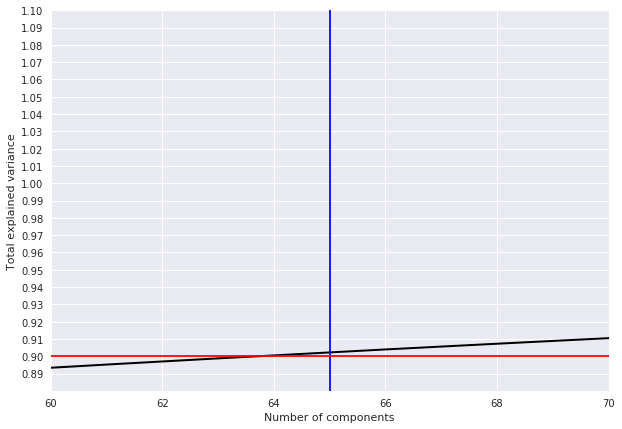

In [85]:
pca = decomposition.PCA(random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(60, 70)
plt.ylim(0.88, 0.92)
plt.yticks(np.arange(0.89, 1.1, 0.01))
plt.axvline(65, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [53]:
# Ваш код здесь


**Вопрос 1:**<br>
Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

In [1]:
65

**Варианты:**
- 56 
- 65
- 66
- 193

**Вопрос 2:**<br>
Сколько процентов дисперсии приходится на первую главную компоненту? Округлите до целых процентов. 

**Варианты:**
- 45
- 51
- 56
- 61

In [4]:
51

Визуализируйте данные в проекции на первые две главные компоненты.

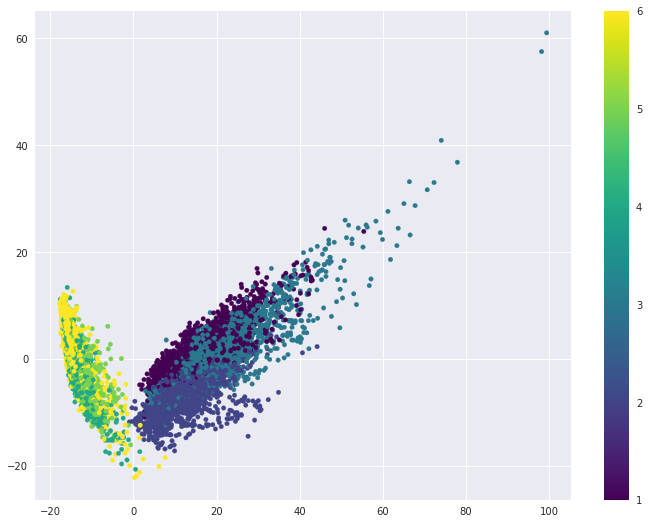

In [86]:
#pca = decomposition.PCA(n_components=2,random_state=RANDOM_STATE)
#X_centered = X_scaled - X_scaled.mean(axis=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

plt.colorbar()

**Вопрос 3:**<br>
Если все получилось правильно, Вы увидите сколько-то кластеров, почти идеально отделенных друг от друга. Какие виды активности входят в эти кластеры?<br>

**Ответ:**
- 1 кластер: все 6 активностей
- 2 кластера: (ходьба, подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание)
- 3 кластера: (ходьба), (подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание)
- 6 кластеров

------------------------------

In [89]:
X_scaled.shape

(10299L, 561L)

In [91]:
X_scaled

array([[  2.10533854e-01,  -6.87026385e-02,  -4.52194533e-01, ...,
         -6.74432366e-01,   3.82007658e-01,  -1.61505480e-02],
       [  6.02084832e-02,   3.59023537e-02,  -2.75221885e-01, ...,
         -6.81359801e-01,   3.83147865e-01,  -1.20627169e-04],
       [  7.84597052e-02,  -4.64269585e-02,  -8.55480582e-02, ...,
         -6.89470939e-01,   3.84288531e-01,   1.92144041e-02],
       ..., 
       [  1.11821625e+00,   1.28805864e+00,  -1.29414692e-01, ...,
         -3.10750224e-01,   6.91509049e-01,   8.75719123e-01],
       [ -5.43492722e-01,   9.75327452e-01,   2.34319837e-01, ...,
         -3.19283719e-01,   6.59762215e-01,   8.99444350e-01],
       [ -1.78515253e+00,  -1.86663622e-02,  -5.29759691e-01, ...,
         -3.19991245e-01,   6.56994458e-01,   9.01454465e-01]])

In [88]:
X_pca.shape

(10299L, 561L)

In [92]:
X_pca

array([[ -1.63809798e+01,   1.99508307e+00,   3.41569023e+00, ...,
          3.83886408e-16,  -2.26414955e-16,   7.42910232e-16],
       [ -1.55821733e+01,   1.18259368e+00,  -3.21206753e-01, ...,
          7.16732944e-17,  -3.69392362e-17,  -6.29684226e-15],
       [ -1.54239892e+01,   2.24316643e+00,  -1.23778356e+00, ...,
          1.28860856e-16,  -3.01061168e-16,   2.14310672e-15],
       ..., 
       [  1.18468531e+01,  -3.43356502e+00,   2.18801926e+00, ...,
         -1.65759409e-18,  -5.10894477e-17,   8.93095965e-16],
       [  8.20668637e+00,  -4.38648876e+00,   1.31871955e+00, ...,
         -1.78428040e-16,   5.32328561e-17,   7.98912552e-15],
       [  9.31117251e+00,  -3.98616133e+00,   1.93301747e+00, ...,
          9.02919429e-17,   4.13758852e-17,   4.69861350e-15]])

Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае мы подскажем, что нужно искать именно 6 кластеров, но в общем случае мы не будем знать, сколько кластеров надо искать.

Параметры:

- **n_clusters** = n_classes (число уникальных меток целевого класса)
- **n_init** = 100
- **random_state** = RANDOM_STATE (для воспроизводимости результата)

Остальные параметры со значениями по умолчанию.

In [90]:
kmeans = KMeans(n_clusters=6,n_init = 100, random_state=RANDOM_STATE).fit(X_pca)

In [93]:
kmeans.labels_

array([4, 4, 4, ..., 3, 3, 3])

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

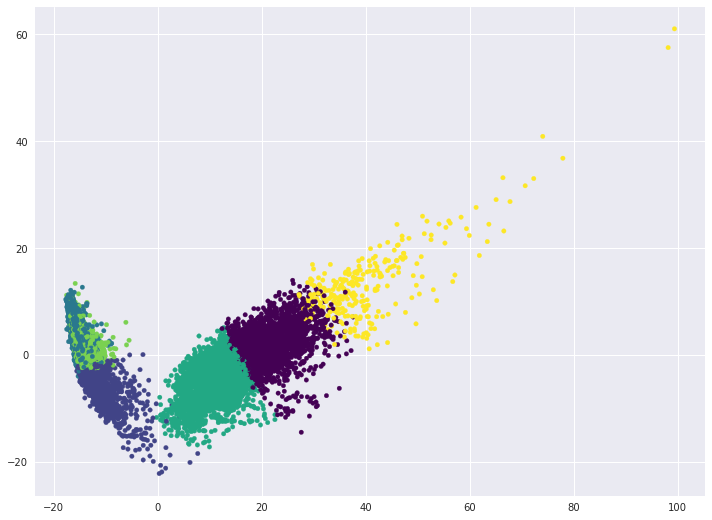

In [94]:
cluster_labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  cmap='viridis');

Посмотрите на соответствие между метками кластеров и исходными метками классов и на то, какие виды активностей алгоритм `KMeans` путает.

In [95]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,742,0,0,903,0,77,1722
подъем вверх по лестнице,295,2,0,1242,0,5,1544
спуск по лестнице,889,0,0,321,0,196,1406
сидение,0,451,91,1,1234,0,1777
стояние,0,566,0,0,1340,0,1906
лежание,0,330,1556,5,53,0,1944
все,1926,1349,1647,2472,2627,278,10299


In [97]:
#ходьба
903/1722.

0.524390243902439

In [98]:
#подъем вверх по лестнице
1242/1544.

0.8044041450777202

In [99]:
#спуск
889/1406.

0.6322901849217639

In [101]:
#сидение
1234/1777.

0.6944288126055149

In [103]:
#стояние
1340/1906.

0.7030430220356768

In [ ]:
#лежание

In [105]:
1556/1944.

0.8004115226337448

In [106]:
pca64=decomposition.PCA(n_components=64,random_state=RANDOM_STATE)
#X_centered = X_scaled - X_scaled.mean(axis=0)
pca64.fit(X_scaled)
X_pca64 = pca64.transform(X_scaled)

In [113]:
X_pca2.shape

(10299L, 2L)

In [123]:
kmeans64 = KMeans(n_clusters=2,n_init = 100, random_state=RANDOM_STATE).fit(X_pca64)

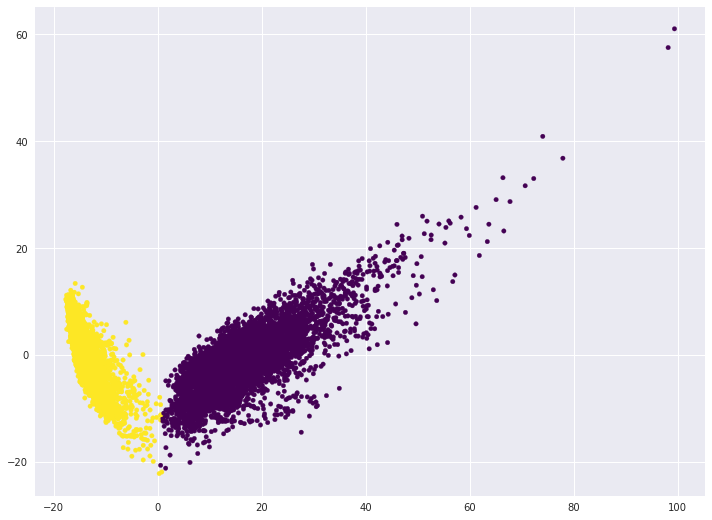

In [124]:
plt.scatter(X_pca64[:, 0], X_pca[:, 1], c=kmeans64.labels_, s=20,  cmap='viridis');

In [110]:
tab = pd.crosstab(y, kmeans64.labels_, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,902,0,0,742,78,1722
подъем вверх по лестнице,0,1240,0,2,297,5,1544
спуск по лестнице,0,320,0,0,890,196,1406
сидение,1234,1,92,450,0,0,1777
стояние,1344,0,0,562,0,0,1906
лежание,52,5,1558,329,0,0,1944
все,2630,2468,1650,1343,1929,279,10299


In [111]:
tab = pd.crosstab(y, kmeans.labels_, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,742,0,0,903,0,77,1722
подъем вверх по лестнице,295,2,0,1242,0,5,1544
спуск по лестнице,889,0,0,321,0,196,1406
сидение,0,451,91,1,1234,0,1777
стояние,0,566,0,0,1340,0,1906
лежание,0,330,1556,5,53,0,1944
все,1926,1349,1647,2472,2627,278,10299


In [116]:
tab = pd.crosstab(y, kmeans2.labels_, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,435,405,0,844,38,1722
подъем вверх по лестнице,0,1014,114,0,414,2,1544
спуск по лестнице,0,162,582,0,500,162,1406
сидение,645,15,0,1117,0,0,1777
стояние,931,2,0,973,0,0,1906
лежание,551,26,0,1367,0,0,1944
все,2127,1654,1101,3457,1758,202,10299


In [112]:
pca2=decomposition.PCA(n_components=2,random_state=RANDOM_STATE)
#X_centered = X_scaled - X_scaled.mean(axis=0)
pca2.fit(X_scaled)
X_pca2 = pca2.transform(X_scaled)

In [114]:
kmeans2 = KMeans(n_clusters=6,n_init = 100, random_state=RANDOM_STATE).fit(X_pca2)

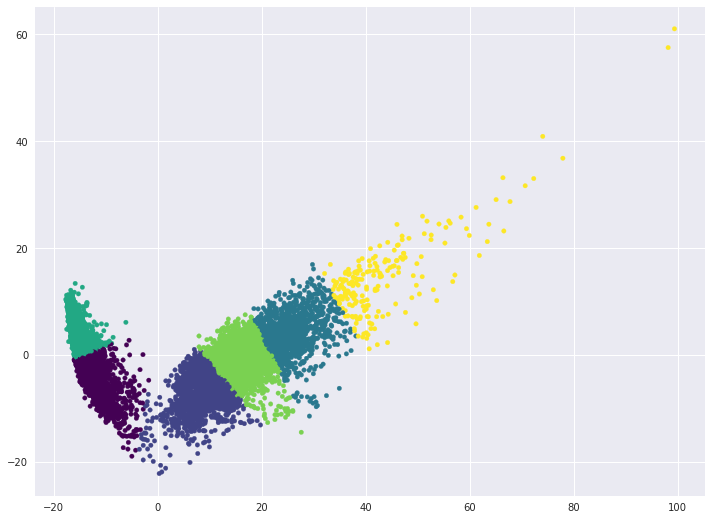

In [115]:
plt.scatter(X_pca64[:, 0], X_pca[:, 1], c=kmeans2.labels_, s=20,  cmap='viridis');

In [117]:
kmeans.inertia_

2577051.0914248955

In [118]:
kmeans64.inertia_

1990388.1456220765

In [119]:
kmeans2.inertia_

205673.76446695253

Видим, что каждому классу (т.е. каждой активности) соответствуют несколько кластеров. Давайте посмотрим на максимальную долю объектов в классе, отнесенных к какому-то одному кластеру. Это будет простой метрикой, характеризующей, насколько легко класс отделяется от других при кластеризации. 

Пример: если для класса "спуск по лестнице", в котором 1406 объектов,  распределение кластеров такое:
 - кластер 1 – 900
 - кластер 3 – 500
 - кластер 6 – 6,
 
то такая доля будет 900 / 1406 $\approx$ 0.64.
 

**Вопрос 4:**<br>
Какой вид активности отделился от остальных лучше всего в терминах простой  метрики, описанной выше?<br>

**Ответ:**
- ходьба
- стояние
- спуск по лестнице
- нет верного ответа

Видно, что kMeans не очень хорошо отличает только активности друг от друга. Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только `n_clusters`.

ValueError: x and y must have same first dimension, but have shapes (7L,) and (6L,)

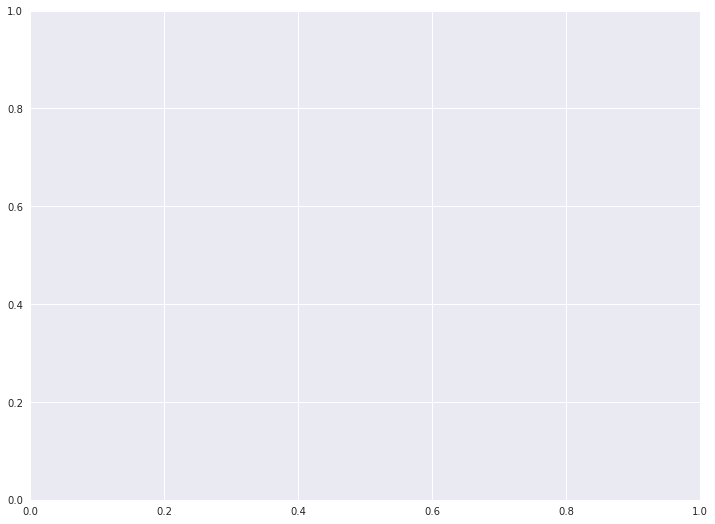

In [120]:
# Ваш код здесь
inertia = []
for k in tqdm_notebook(range(1, 6 + 1)):
    kmeans = KMeans(n_clusters=k, n_init = 100, random_state=RANDOM_STATE).fit(X_pca64)
    inertia.append(np.sqrt(kmeans.inertia_))



In [121]:
inertia

[2278.0753755165324,
 1638.535092289007,
 1527.518223653118,
 1481.2214920530685,
 1438.0161911535454,
 1410.8111658269779]

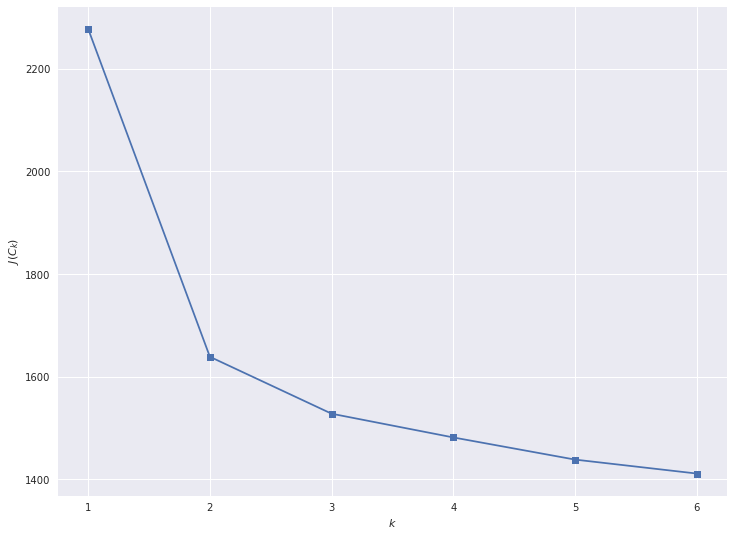

In [122]:
plt.plot(range(1, 7), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

**Вопрос 5:**<br>
Какое количество кластеров оптимально выбрать, согласно методу локтя?<br>

**Ответ:**
- 1
- 2
- 3
- 4

------------------------

Попробуем еще один метод кластеризации, который описывался в статье – агломеративную кластеризацию.

In [125]:
n_classes

6

In [126]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca64)

In [131]:
kmeans = KMeans(n_clusters=6, n_init = 100, random_state=RANDOM_STATE).fit(X_pca64)

Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans` с параметрами из задания к 4 вопросу.

In [137]:
len(ag.labels_)


10299

In [136]:
ag.labels_.len()

AttributeError: 'numpy.ndarray' object has no attribute 'len'

In [135]:
import random

In [145]:
randomlist = [random.randrange(0, 6) for _ in range(0, 10299)]

In [143]:
np.max(randomlist)

5

In [154]:
mlabels = 5-ag.labels_

In [155]:
mlabels

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [150]:
ag.labels_

array([5, 5, 5, ..., 0, 0, 0], dtype=int64)

In [156]:
from sklearn import metrics
metrics.adjusted_rand_score(y, mlabels)

0.44036193911669164

In [132]:
metrics.adjusted_rand_score(y, kmeans.labels_)

0.41960546531445048

In [146]:
metrics.adjusted_rand_score(y, randomlist)

-0.00010839947777504289

**Вопрос 6:**<br>
Отметьте все верные утверждения.<br>

**Варианты:**
- Согласно ARI, KMeans справился с кластеризацией хуже, чем Agglomerative Clustering
- Для ARI не имеет значения какие именно метки присвоены кластерам, имеет значение только разбиение объектов на кластеры
- В случае случайного разбиения на кластеры ARI будет близок к нулю

-------------------------------

Можно заметить, что задача не очень хорошо решается именно как задача кластеризации, если выделять несколько кластеров (> 2). Давайте теперь решим задачу классификации, вспомнив, что данные у нас размечены.  

Для классификации используйте метод опорных векторов – класс `sklearn.svm.LinearSVC`. Мы в курсе отдельно не рассматривали этот алгоритм, но он очень известен, почитать про него можно, например, в материалах Евгения Соколова –  [тут](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem11_linear.pdf). 

Настройте для `LinearSVC` гиперпараметр `C` с помощью `GridSearchCV`. 

- Обучите новый `StandardScaler` на обучающей выборке (со всеми исходными признаками), примените масштабирование к тестовой выборке
- В `GridSearchCV` укажите  cv=3.

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV
#
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [174]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [193]:
grid = GridSearchCV(svc, 
                         svc_params, 
                         cv=3, scoring='accuracy') 

In [194]:
%%time
grid.fit(X_train_scaled, y_train)

Wall time: 2min 8s


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [192]:
GridSearchCV?

In [195]:
# Ваш код здесь
best_svc = grid.best_estimator_

In [196]:
grid.best_params_

{'C': 0.1}

In [197]:
grid.best_score_

0.93824809575625678

**Вопрос 7**<br>
Какое значение гиперпараметра `C` было выбрано лучшим по итогам кросс-валидации?<br>

**Ответ:**
- 0.001
- 0.01
- 0.1
- 1
- 10

In [198]:
y_predicted = best_svc.predict(X_test_scaled)

In [172]:
np.unique(y_test, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([502, 446, 427, 533, 560, 622], dtype=int64))

In [199]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,4,412,1,1,0,420
сидение,0,4,0,427,60,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,469,412,443,589,526,2947


In [189]:
12+2+2+4+4+1+15+1+60+11

112

In [203]:
494+459+412+427+517+526

2835

In [200]:
112/2947.

0.03800475059382423

In [202]:
2947.*(1-0.93824809575625678)

181.98286180631126

**Вопрос 8:**<br>
Какой вид активности SVM определяет хуже всего в терминах точности? Полноты? <br>

**Ответ:**
- по точности – подъем вверх по лестнице, по полноте – лежание
- по точности – лежание, по полноте – сидение
- по точности – ходьба, по полноте – ходьба
- + по точности – стояние, по полноте – сидение 

In [183]:
pca64_train_scaled = decomposition.PCA(n_components=64, random_state=RANDOM_STATE).fit(X_train_scaled)

In [184]:
X_train_scaled_pca64 = pca64_train_scaled.transform(X_train_scaled)
X_test_scaled_pca64 = pca64_train_scaled.transform(X_test_scaled)

In [185]:
%%time
grid.fit(X_train_scaled_pca64, y_train)

Wall time: 40.4 s


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [186]:
grid.best_score_

0.9005712731229597

In [204]:
0.93824809575625678-0.9005712731229597

0.03767682263329708

Наконец, проделайте то же самое, что в 7 вопросе, только добавив PCA.

- Используйте выборки `X_train_scaled` и `X_test_scaled`
- Обучите тот же PCA, что раньше, на отмасшабированной обучающей выборке, примените преобразование к тестовой
- Настройте гиперпараметр `C` на кросс-валидации по обучающей выборке с PCA-преобразованием. Вы заметите, насколько это проходит быстрее, чем раньше.

**Вопрос 9:**<br>
Какова разность между лучшим качеством (долей верных ответов) на кросс-валидации в случае всех 561 исходных признаков и во втором случае, когда применялся метод главных компонент? Округлите до целых процентов.<br>

**Варианты:**
- Качество одинаковое
- 2%
- 4% 
- 10%
- 20%


**Вопрос 10:**<br>
Выберите все верные утверждения:

**Варианты:**
- Метод главных компонент в данном случае позволил уменьшить время обучения модели, при этом качество (доля верных ответов на кросс-валидации) очень пострадало, более чем на 10%
- PCA можно использовать для визуализации данных, однако для этой задачи есть и лучше подходящие методы, например, tSNE. Зато PCA имеет меньшую вычислительную сложность
- PCA строит линейные комбинации исходных признаков, и в некоторых задачах они могут плохо интерпретироваться человеком